<a href="https://colab.research.google.com/github/SRINIRAGZ/sentimentAnalysis/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clone the git repo

In [1]:
from getpass import getpass

# Securely ask for GitHub token
token = getpass("Enter your GitHub token: ")
!git clone https://{token}@github.com/SRINIRAGZ/sentimentAnalysis.git

Enter your GitHub token: ··········
Cloning into 'sentimentAnalysis'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 25 (delta 7), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (25/25), 608.66 KiB | 3.69 MiB/s, done.
Resolving deltas: 100% (7/7), done.


### Installation of libraries

In [ ]:
!pip install transformers torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 98.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 61.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [71]:
import numpy as np
import os
import pandas as pd
import re


import matplotlib.pyplot as plt
import seaborn as sns

current_directory = os.getcwd()
print(f"Current working directory: {current_directory}")

Current working directory: /content


### Configs

In [9]:
##PArams
filename = 'engagements.csv'
DataFolder = './sentimentAnalysis/data/{filename}'
ResultsFolder = './sentimentAnalysis/results/{filename}'

### Data Import

In [167]:
df = pd.read_csv(DataFolder.format(filename=filename))

In [168]:
df.head()

,timestamp,media_id,media_caption,comment_text
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it
3,2025-03-01 00:41:59.467000+00:00,1098364052333950,Why use one scrub when you can use them all at...,Please carry these in Canada! I miss them so m...
4,2025-03-01 02:21:29.715000+00:00,1083943630442659,Vanilla Serum-Infused Hand Wash: A sweet escap...,I love it ..✌️


In [169]:
def dataprint(comments_display=True, rows=5):
  if comments_display:
    pd.set_option('display.max_colwidth', None)
  print(df.head(rows))
  if comments_display:
    pd.reset_option('display.max_colwidth')

In [170]:
#converting to valid datetime type for tiemstamp
df['timestamp'] = pd.to_datetime(df['timestamp'], format='mixed', utc=True)
df['media_caption'] = df['media_caption'].astype(str)
df['media_caption'] = df['media_caption'].str.strip()
df['comment_text'] = df['comment_text'].astype(str)
df['comment_text'] = df['comment_text'].str.strip()
print(df.shape)
print(df.dtypes)

(17841, 4)
timestamp        datetime64[ns, UTC]
media_id                       int64
media_caption                 object
comment_text                  object
dtype: object


In [171]:
 df.media_id.value_counts().reset_index()

,media_id,count
0,18036343751267796,5762
1,18059074886050845,2459
2,18047477606343932,1653
3,1125861369584218,1222
4,18051403259269591,982
...,...,...
350,18001778971903506,1
351,1083943630442659,1
352,1114143270756028,1
353,1124943973009291,1


## Data Cleaning

In [172]:
#cleaning duplicates
df.drop_duplicates(inplace=True)
df.shape

(17841, 4)

In [173]:
#estimatine timestap difference between same media
df.sort_values(['timestamp','media_id'], inplace=True)
df['timedelta'] = df.groupby('media_id')['timestamp'].diff()
df.head()

,timestamp,media_id,media_caption,comment_text,timedelta
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,NaT
8857,2025-03-01 00:13:57.032000+00:00,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,I miss the old line…,NaT
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,NaT
8858,2025-03-01 00:13:57.696000+00:00,17950254656929862,Why use one scrub when you can use them all at...,Noooo,NaT
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,0 days 00:09:09.183000


In [174]:
maxlen = df[['media_caption','comment_text']].apply(lambda x: x.str.len().max())
print(maxlen)


media_caption    993
comment_text     745
dtype: int64


In [175]:
#Clean Mentions in comment
def comments_category(text):
  mention_pattern = r"'@\w+"
  has_mention = re.search(mention_pattern, text)
  text_without_mentions = re.sub(mention_pattern, '', text)
  if has_mention and text_without_mentions == '':
      return 'mentions'
  elif has_mention and text_without_mentions != '':
      return 'commentions'
  elif len(text.strip())==0:
      return 'no comments'
  else:
      return 'comments'



In [176]:
df['comment_type'] = df['comment_text'].apply(comments_category)
df['comment_type'].value_counts()

,count
comment_type,
comments,11914
mentions,3442
commentions,2485


In [177]:
df['count'] = df.groupby('media_id')['media_id'].transform('count')
df.head()

,timestamp,media_id,media_caption,comment_text,timedelta,comment_type,count
2,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,NaT,comments,16
8857,2025-03-01 00:13:57.032000+00:00,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,I miss the old line…,NaT,comments,6
0,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,NaT,comments,6
8858,2025-03-01 00:13:57.696000+00:00,17950254656929862,Why use one scrub when you can use them all at...,Noooo,NaT,comments,105
1,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,0 days 00:09:09.183000,comments,105


In [179]:
df['comment_wo_mentions'] = df['comment_text'].str.replace(r"'@\w+",'', regex=True)
df[df['comment_type']=='mentions'].head()

,timestamp,media_id,media_caption,comment_text,timedelta,comment_type,count,comment_wo_mentions
11,2025-03-01 01:42:31.207000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@nat_albano26,NaT,mentions,106,
16,2025-03-01 02:10:18.231000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@adbircheat,0 days 00:27:47.024000,mentions,106,
7,2025-03-01 02:12:43.282000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@brittany_lollar,0 days 00:02:25.051000,mentions,106,
9,2025-03-01 02:27:01.167000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@kalwone,0 days 00:14:17.885000,mentions,106,
8865,2025-03-01 03:14:00.708000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@gg3angels,0 days 00:46:59.541000,mentions,106,


In [106]:
print(df.groupby('media_id')['timedelta'].agg({'max', 'min','count'}).sort_values('max',ascending=False))
print(df.groupby('media_id')['timedelta'].agg({'max', 'min','count'}).sort_values('min',ascending=True))

                                      max                     min  count
media_id                                                                
1096745559162466  28 days 07:35:29.093000 28 days 07:35:29.093000      1
17892295521150742 25 days 20:12:34.876000 25 days 20:12:34.876000      1
1098549342315421  24 days 11:17:04.630000  1 days 09:01:29.922000      2
1090986906404998  23 days 08:14:00.786000  0 days 00:41:50.886000      5
1096749045828784  22 days 13:10:03.545000  3 days 15:30:55.011000      2
...                                   ...                     ...    ...
18309791359230658                     NaT                     NaT      0
18353525119177567                     NaT                     NaT      0
18382137973117021                     NaT                     NaT      0
18444668200050240                     NaT                     NaT      0
18492568414041118                     NaT                     NaT      0

[355 rows x 3 columns]
                           

In [180]:
df2=df[['media_id','media_caption']].drop_duplicates()

### Looking for Semantic Similarities between media text

Semantic similarities can be achieved using mini language models which help in identifying clusters in language models and also help in clustering. Here our aim is to cluster using the embeddings we can further chalk analyze based on individula clusters.

In [62]:
#params
MODEL='all-mpnet-base-v2' #'all-MiniLM-L12-v2'

In [181]:
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

# Generate embeddings
embedder = SentenceTransformer(MODEL)
embeddings = embedder.encode(list(df2['media_caption']))



Some weights of RobertaModel were not initialized from the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


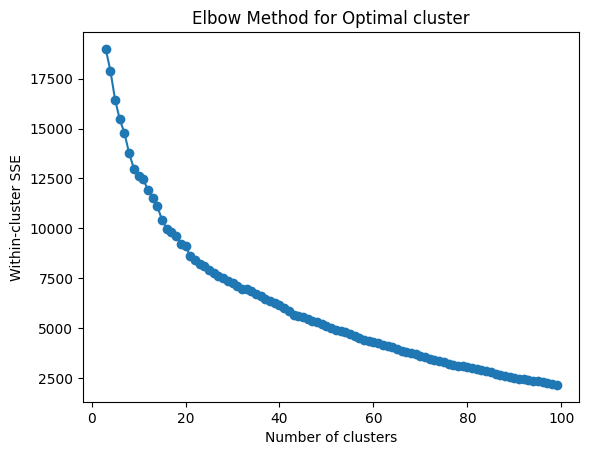

In [182]:
clusterlist = range(3,100)
sse=[] #error/ loss
# Cluster into 3 themes (adjust as needed)
for k in clusterlist:
    clustering_model = KMeans(n_clusters=k, random_state=42)
    clustering_model.fit(embeddings)
    sse.append(clustering_model.inertia_)

# Plot Elbow Curve
plt.plot(clusterlist, sse, marker='o')
plt.xlabel("Number of clusters")
plt.ylabel("Within-cluster SSE")
plt.title("Elbow Method for Optimal cluster")
plt.show()
# for k, sse in zip(list(range(len(sse))),sse):
#   print(k, sse)

In [183]:
# k= ~38 for optimal clustering
num_clusters = 38
clustering_model = KMeans(n_clusters=num_clusters, random_state=42)
clustering_model.fit(embeddings)
cluster_assignment = clustering_model.labels_

In [184]:
df2['cluster'] = cluster_assignment
df2.head()

,media_id,media_caption,cluster
2,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,15
8857,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,15
0,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",4
8858,17950254656929862,Why use one scrub when you can use them all at...,14
3,1098364052333950,Why use one scrub when you can use them all at...,36


In [185]:
df = df.merge(df2[['media_id','cluster']],how='left',on='media_id')
df['cluster'] = df['cluster'].astype(str)
df.head()

,timestamp,media_id,media_caption,comment_text,timedelta,comment_type,count,comment_wo_mentions,cluster
0,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,NaT,comments,16,Love it,15
1,2025-03-01 00:13:57.032000+00:00,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,I miss the old line…,NaT,comments,6,I miss the old line…,15
2,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,NaT,comments,6,I bet this is good,4
3,2025-03-01 00:13:57.696000+00:00,17950254656929862,Why use one scrub when you can use them all at...,Noooo,NaT,comments,105,Noooo,14
4,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,0 days 00:09:09.183000,comments,105,i know this smells so good,14


## Sentiment Analysis

Using RoBERTa model to analyse sentiment because its a robust pretrained BERT model optimized for sentiment analysis. BERT also is better at understanding context

In [156]:
#model params
MODEL = "cardiffnlp/twitter-roberta-base-sentiment"
label_mapping = {'LABEL_0': 'Negative', 'LABEL_1': 'Neutral', 'LABEL_2': 'Positive'}

In [157]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification

# Load sentiment analysis pipeline

sentiment_classifier = pipeline("sentiment-analysis", model=MODEL)


Device set to use cuda:0


In [191]:
# Run sentiment analysis
df3 = list(df['comment_wo_mentions'])
results = sentiment_classifier(df3)

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1750: FutureWarning: `encoder_attention_mask` is deprecated and will be removed in version 4.55.0 for `RobertaSdpaSelfAttention.forward`.
  return forward_call(*args, **kwargs)


In [159]:
# Display results
i=0
for comment, result in zip(df['comment_text'], results):
    print(f"{comment} => {label_mapping[result['label']]} (score: {result['score']:.2f})")
    print(result)
    if i>5:
      break
    i+=1

Love it => Positive (score: 0.92)
{'label': 'LABEL_2', 'score': 0.9205260276794434}
I miss the old line… => Neutral (score: 0.59)
{'label': 'LABEL_1', 'score': 0.588294506072998}
I bet this is good => Positive (score: 0.97)
{'label': 'LABEL_2', 'score': 0.9709283113479614}
Noooo => Neutral (score: 0.45)
{'label': 'LABEL_1', 'score': 0.45171988010406494}
i know this smells so good => Positive (score: 0.98)
{'label': 'LABEL_2', 'score': 0.9758529663085938}
Please carry these in Canada! I miss them so much! => Positive (score: 0.56)
{'label': 'LABEL_2', 'score': 0.5638464689254761}
Body scrub cocktail vibes 🔥😍 => Positive (score: 0.92)
{'label': 'LABEL_2', 'score': 0.923005998134613}


In [192]:
#Rework on the dataframe with sentiment results
df['sentiment'] = [label_mapping[result['label']] for result in results]
df['sentiment_score'] = [result['score'] for result in results]
df.head()

,timestamp,media_id,media_caption,comment_text,timedelta,comment_type,count,comment_wo_mentions,cluster,sentiment,sentiment_score
0,2025-03-01 00:04:05.094000+00:00,1090109319826090,Morning routine with Tree Hut 🍊🫧 Now available...,Love it,NaT,comments,16,Love it,15,Positive,0.920526
1,2025-03-01 00:13:57.032000+00:00,1091806986322990,My go-to for waking up my skin! 🍊🫧 Click the l...,I miss the old line…,NaT,comments,6,I miss the old line…,15,Neutral,0.588295
2,2025-03-01 00:13:57.153000+00:00,1090986906404998,"Soft skin, soft life 🩷🌸🫧 get your hands on thi...",I bet this is good,NaT,comments,6,I bet this is good,4,Positive,0.970928
3,2025-03-01 00:13:57.696000+00:00,17950254656929862,Why use one scrub when you can use them all at...,Noooo,NaT,comments,105,Noooo,14,Neutral,0.451720
4,2025-03-01 00:23:06.879000+00:00,17950254656929862,Why use one scrub when you can use them all at...,i know this smells so good,0 days 00:09:09.183000,comments,105,i know this smells so good,14,Positive,0.975853


### Results Analysis

In [193]:
df.pivot_table(index='comment_type', columns='sentiment',values='sentiment_score',aggfunc='mean')

sentiment,Negative,Neutral,Positive
comment_type,,,
commentions,0.695235,0.667870,0.853319
comments,0.743327,0.721028,0.869001
mentions,NaN,0.451272,NaN


In [222]:
df['mentions_count_bymedia'] = df[df.comment_type.str.contains('mentions')].groupby('media_id',as_index=False)['comment_type'].transform('count')
df['mentions_count_bycluster'] = df[df.comment_type.str.contains('mentions')].groupby('cluster',as_index=False)['comment_type'].transform('count')

df[df.comment_type== 'mentions']


,timestamp,media_id,media_caption,comment_text,timedelta,comment_type,count,comment_wo_mentions,cluster,sentiment,sentiment_score,mentions_count,mentions_count_bymedia,mentions_count_bycluster
11,2025-03-01 01:42:31.207000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@nat_albano26,NaT,mentions,106,,8,Neutral,0.451272,87.0,87.0,5464.0
14,2025-03-01 02:10:18.231000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@adbircheat,0 days 00:27:47.024000,mentions,106,,8,Neutral,0.451272,87.0,87.0,5464.0
15,2025-03-01 02:12:43.282000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@brittany_lollar,0 days 00:02:25.051000,mentions,106,,8,Neutral,0.451272,87.0,87.0,5464.0
18,2025-03-01 02:27:01.167000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@kalwone,0 days 00:14:17.885000,mentions,106,,8,Neutral,0.451272,87.0,87.0,5464.0
23,2025-03-01 03:14:00.708000+00:00,18021315083459733,Orange you glad it’s giveaway time?! 🍊✨\n\nTha...,'@gg3angels,0 days 00:46:59.541000,mentions,106,,8,Neutral,0.451272,87.0,87.0,5464.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17754,2025-04-02 17:51:34.367000+00:00,18038401034240788,✨Time for a Giveaway✨\n\nA spritz a day keeps ...,'@navihelps,0 days 01:28:42.615000,mentions,943,,8,Neutral,0.451272,828.0,828.0,5464.0
17762,2025-04-02 17:53:15.394000+00:00,18038401034240788,✨Time for a Giveaway✨\n\nA spritz a day keeps ...,'@secretlifeofscarlett_,0 days 00:01:41.027000,mentions,943,,8,Neutral,0.451272,828.0,828.0,5464.0
17763,2025-04-02 17:53:17.484000+00:00,18038401034240788,✨Time for a Giveaway✨\n\nA spritz a day keeps ...,'@olivia_johnson4609,0 days 00:00:02.090000,mentions,943,,8,Neutral,0.451272,828.0,828.0,5464.0
17794,2025-04-02 18:06:26.377000+00:00,18038401034240788,✨Time for a Giveaway✨\n\nA spritz a day keeps ...,'@isla_venney,0 days 00:13:08.893000,mentions,943,,8,Neutral,0.451272,828.0,828.0,5464.0


/tmp/ipython-input-224-3520183138.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


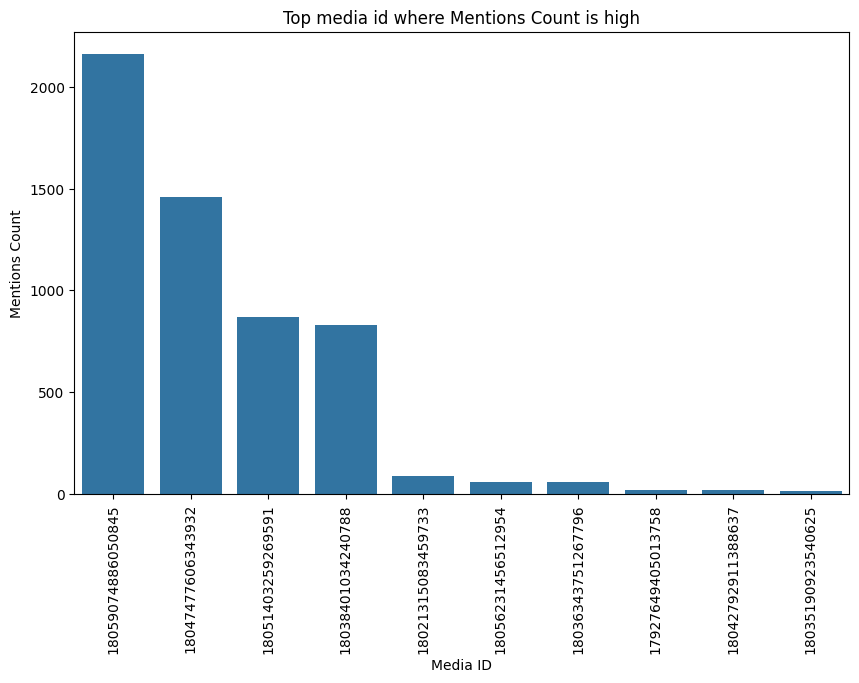

In [224]:
df4 = df[(df.comment_type== 'mentions')&(df.mentions_count_bymedia>10)][['media_id','mentions_count_bymedia']].drop_duplicates()
fig,ax = plt.subplots(figsize=(10, 6))
sns.barplot(data=df4,y='mentions_count_bymedia',x='media_id', ax=ax, order=df4.sort_values('mentions_count_bymedia', ascending=False).media_id)
ax.set_xlabel('Media ID')
ax.set_ylabel('Mentions Count')
ax.set_title('Top media id where Mentions Count is high')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show()

cluster                      object
mentions_count_bycluster    float64
dtype: object


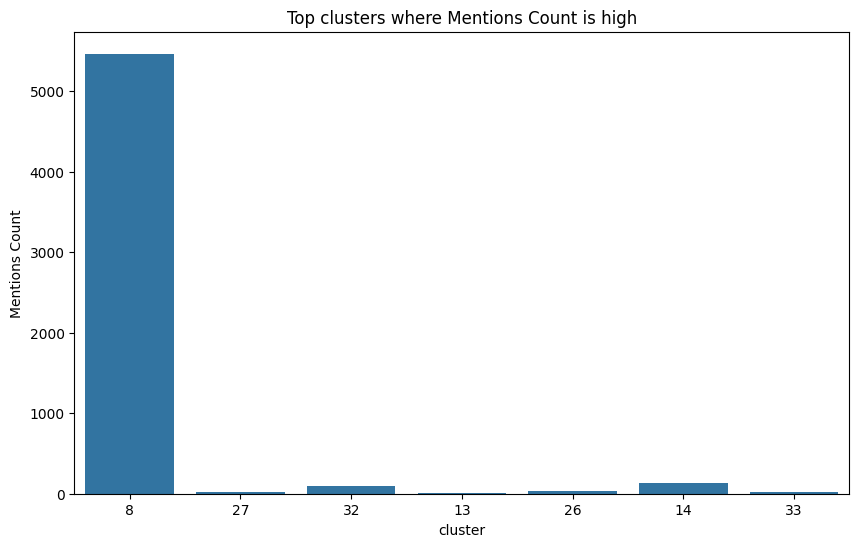

In [232]:
df4 = df[(df.comment_type== 'mentions')&(df.mentions_count_bycluster>10)][['cluster','mentions_count_bycluster']].drop_duplicates()
df4['cluster'] = df4['cluster'].astype(str)
print(df4.dtypes)
fig2,ax2 = plt.subplots(figsize=(10, 6))
sns.barplot(data=df4,y='mentions_count_bycluster', x='cluster', ax=ax2)
ax2.set_xlabel('cluster')
ax2.set_ylabel('Mentions Count')
ax2.set_title('Top clusters where Mentions Count is high')
plt.show()

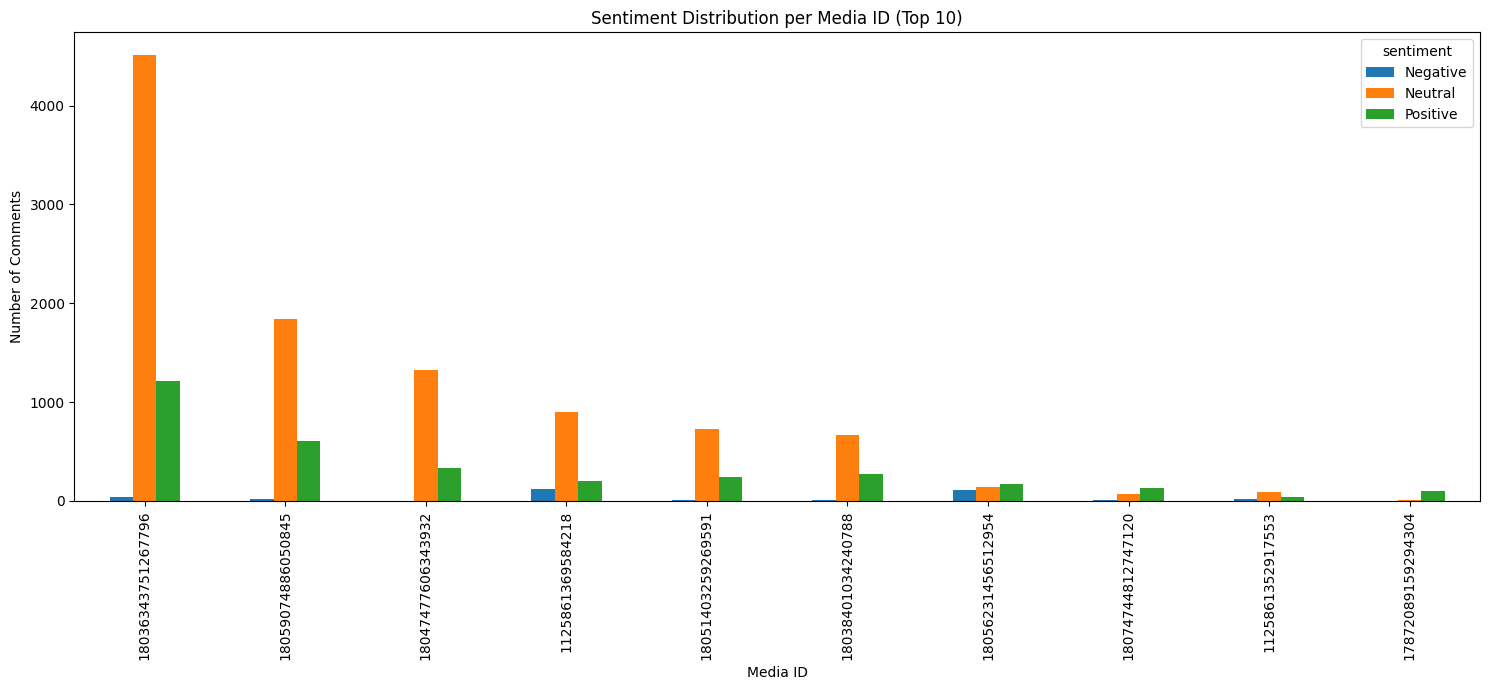

In [242]:
sentiment_counts = df.groupby(['media_id', 'sentiment']).size().unstack(fill_value=0)

# For better visualization, let's consider media_ids with a significant number of comments
top_media_ids = df['media_id'].value_counts().head(10).index
sentiment_counts_subset = sentiment_counts.loc[top_media_ids]

sentiment_counts_subset.plot(kind='bar', figsize=(15, 7))
plt.title('Sentiment Distribution per Media ID (Top 10)')
plt.xlabel('Media ID')
plt.ylabel('Number of Comments')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/tmp/ipython-input-277-2835795866.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)


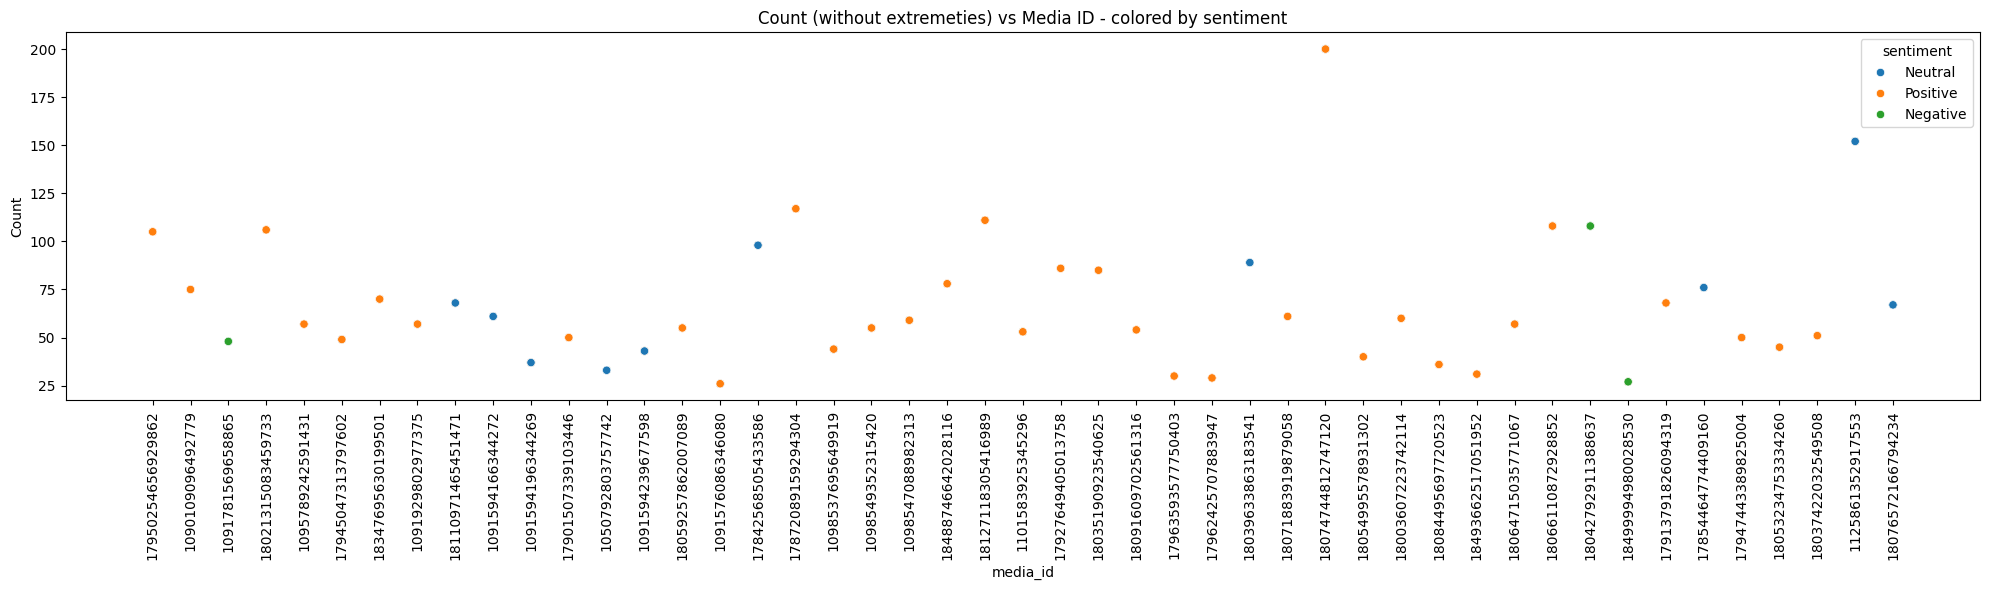

In [277]:
fig, ax = plt.subplots(figsize=(20, 6))
sentiment_df = df[(df.comment_type.str.contains('com'))&(df['count']>25)&(df['count']<250)].copy()
sentiment_df['media_id'] = sentiment_df['media_id'].astype(str)
sentiment_df.head()


sns.scatterplot(data=sentiment_df, x='media_id', y='count', ax=ax, hue='sentiment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_ylabel('Count')
ax.set_title('Count (without extremeties) vs Media ID - colored by sentiment')
plt.xticks(rotation=90)
# ax.set_yscale('log')
plt.tight_layout()
plt.show()

## Summarization

### Final Plots

In [280]:
summarizer_model = "facebook/bart-large-cnn" #"google/flan-t5-large"

In [281]:
summarizer = pipeline("summarization", model=summarizer_model)


Device set to use cuda:0


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [278]:
for m in df['media_id'].unique():
  print(f'\nmedia: {m}')
  for s in ['Positive','Negative']:
    df_tmp = df[(df['media_id']==m)&(df.comment_type.str.contains('com'))&(df.sentiment==s)]
    comments = list(df_tmp['comment_wo_mentions'])
    comments = [str(i)+". "+c+"\n" for i,c in enumerate(comments)]
    allcomments = f"Summarize all the following {s} user comments on products: " + " ".join(comments)
    summary = summarizer(allcomments, max_length=25, min_length=5, do_sample=False)
    print(f"\t{s} summary: {summary[0]['summary_text']}")



media: 1090109319826090


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
